# SIADS 515: Introduction to the Linux Command Line Interface (CLI)

### Note -- Have you considered including \'$Echo' in this lecture?

# Overview

* why use the Linux CLI? (why not python?)
* a case study
* filesystem basics (cd, pwd, ls)
* viewing & editing files (cat, more, less, head, tail, nano)
* sorting & filtering (sort, uniq, cut, grep)
* processes (ps, kill, top)
* other tips (clear, ^A, ^E, ^U, tab-completion)


# Why Not Python?

* sometimes, python is not the best choice for data processing
* not great for "quick and dirty"
* can often use one line of linux commands in lieu of 10 lines of python

# Case Study: Wearable Device data

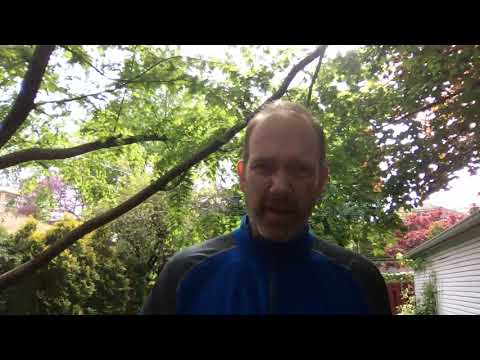

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('tCG-Q71707k')

In [6]:
!ls -l

total 132
-rw-r--r-- 1 jovyan users 42231 Jul 22 16:54 LinuxCLI_Slides.ipynb
-rw-r--r-- 1 jovyan users 86055 Jul 22 16:41 ride2018.csv


# Let's look at the data:

# Let's look at the data:
* messy (includes nondescript header, as well as an excessive amount of unused fields)
* exhibits strong pattern of lines beginning with either "data" or "definition"
* not what you would expect from a CSV file!


# We want to extract the latitude, longitude, speed, altitude (and eventually heart rate) and create a more "traditional" CSV file.

## <font color="magenta">Question:  List 3 ways / libraries you could use to do this in python.<font>

* CSVDictReader from csv
* File open and then readline() from builtin python libraries
* pd.read.csv(), pandas.read.csv(), read.csv("file")

In [42]:
import csv
with open("ride2018.csv") as f:
    reader = csv.DictReader(f)
    for row in reader:
        if(0): # Change to 1 to view the unfiltered output
            print(row)
        
        if(1): # Change to 1 to view our isolated fields of interest
            if(row['\ufeffType']=="Data" and row['Local Number']=="9"):
                print(row['Field 2'], row['Value 2']) # Latitude
                print(row['Field 3'], row['Value 3']) # Longitude
                print(row['Field 5'], row['Value 5']) # Altitude
                print(row['Field 6'], row['Value 6']) # Speed
                print()

position_lat 504719750
position_long -998493490
altitude 285.79999999999995
speed 1.773

position_lat 504717676
position_long -998501870
altitude 285.0
speed 5.533

position_lat 504716354
position_long -998506792
altitude 284.0
speed 6.485

position_lat 504714055
position_long -998515244
altitude 284.0
speed 6.951

position_lat 504711900
position_long -998523278
altitude 285.0
speed 6.224

position_lat 504709729
position_long -998531192
altitude 286.20000000000005
speed 5.561

position_lat 504707299
position_long -998540018
altitude 286.79999999999995
speed 5.281

position_lat 504705967
position_long -998544934
altitude 287.4
speed 5.029

position_lat 504703695
position_long -998553170
altitude 288.0
speed 5.402

position_lat 504701326
position_long -998561924
altitude 287.20000000000005
speed 6.485

position_lat 504700547
position_long -998564668
altitude 286.20000000000005
speed 6.979

position_lat 504698641
position_long -998571568
altitude 285.20000000000005
speed 7.493

position_l

In [ ]:
# Given 3,4,5, and 6.  What's the total?

In [ ]:
answer = 18

(Insert your answer here)

Insert here the slides and blurbs about the various commands and steps

* use the script from the screencast to get the order and include the highlights as bullet points.
* I've done the first couple; please follow the format as best you can
* note the first two are very simple; please use your perspective as a student to fill in additional points to help
explain what's going on... try it out on the Absolute vs. Relative paths slide
* remember to change the "Slide Type" from blank to "Slide" in the Slideshow Cell Toolbar for the main slide; use fragments for "animations", and use subslides as appropriate.  Each command should be a "Slide".
* please do up to and including 

# ls - list directory contents

Example: 
```
jovyan@jupyter-uniqname:~$ ls
data shared
```


# cd - change working directory

Example:
```
jovyan@jupyter-uniqname:~$ cd data
jovyan@jupyter-uniqname:~/data$ 
```


# pwd

Example:
```
jovyan@jupyter-uniqname:~/data$ pwd
/home/jovyan/data
```


# Additional File Path Notes
- Seeing "." signifies the current working directory
- Seeing ".." signifies a step back/out in the file tree
- Seeing "~" signifies a user's home directory

In the case below, we start off in a directory, "data", in our home directory. We then step back out to our home directory:
```
jovyan@jupyter-uniqname:~/data$ pwd
/home/jovyan/data
jovyan@jupyter-uniqname:~/data$ cd ..
jovyan@jupyter-uniqname:~/
```

# Absolute vs. Relative Paths
* If you see a path beginning with '/', this is what's known as an absolute path
* An absolute path is one which begins in our root, or outer-most directory, '/'
* Absolute paths are great for specifying very exact locations within a system
* Relative paths are paths written *relative* to our current working directory
* To move from /home/ to the directory /data/ we could use
* * Relative Path: $cd jovyan/data

* * Absolute Path: $cd /home/jovyan/data

# Head & Tail : Peek At File Beginning/End 
* Shows 10 lines by default
* Specify lines by writing "-N" where N is the amount of lines desired
Example:
```
jovyan@jupyter-uniqname:~/data$ head -2 TenLines.txt
Line 1
Line 2
jovyan@jupyter-uniqname:~/data$ tail -3 TenLines.txt
Line 8
Line 9
Line 10
```


# cat : Concatenate File(s)
* A common command that pulls all information from a file
* Commonly used for viewing entire files, combining files, or extracting all information from a file for use elsewhere

Example:
```
jovyan@jupyter-uniqname:~/data$ cat Numbers.csv
1,3,2,4,1,5,1,6,2,34,6,2,7,8,1,919,2,3,61,6,4
jovyan@jupyter-uniqname:~/data$
```


# more:
* more will show as much of a file as will fit in the terminal screen
* If you wish to see more, you can page down with Enter or with Space
* 'b' to move back by one page
* 'q' to quit // exit
* more outputs percentage-through-file at the bottom of the screen

# less: 
* less is a similar utility that more easily allows one to scroll back within the file
* Navigation is similar to More, including 'b'ack, 'q'uit, space/enter progression
* Also allows users to navigate/scroll with the arrow keys

# nano: In-Terminal Text Editing
* $nano FileName.txt will open the file if it exists
* Otherwise, nano starts a blank file under that name
* Ctrl+A moves cursor to start-of-line, Ctrl+E moves cursor to end-of-line
* Ctrl+X to initiate the save dialogue
* A "\$" at the left/right edge of the line may be used to indicate a line continues beyond screen width
* Ctrl+G for the Help screen

# Unpacking "ls -l"
* Many commands take single-character "options" following a hyphen (or multicharacter following '--')
* "ls -l" provides long-form listing with more information
* "total" expresses the total disk storage allocation for the directory in Blocks

```
jovyan@jupyter-uniqname:~/SomeDirectory$ ls -l
total 164
-rw-r--r-- 1 jovyan users 76907 Jul 23 14:46 Notebook.ipynb
-rw-r--r-- 1 root   root  86055 Jul 23 14:53 ride2018.csv
```

* The ten-character sequence expresses permission information 
* The first character is -/l/d. '-' means regular file, 'l' means symlink, and 'd' means directory
* The following 9 characters are triplets of 3 characters, 'rwx', for File-Owner, Group, and Other (Unassociated Users)
* "- rw- r-- r--" indicates a regular file, owner read-write permissions, and read permissions for Group and Other

```
jovyan@jupyter-uniqname:~/SomeDirectory$ ls -l
total 164
-rw-r--r-- 1 jovyan users 76907 Jul 23 14:46 Notebook.ipynb
-rw-r--r-- 1 root   root  86055 Jul 23 14:53 ride2018.csv
```

* The next value indicates count of hard-links to the file
* The following values represent the file-owner (jovyan) and permission-group (users)
* The numerical value following represents how many bytes.
* * For more human-readable representations, KB/MB/GB, try "ls -lh"
* The following three pieces of information represent the time the file was last modified
* The concluding field is the filename

```
jovyan@jupyter-uniqname:~/SomeDirectory$ ls -l
total 164
-rw-r--r-- 1 jovyan users 76907 Jul 23 14:46 Notebook.ipynb
-rw-r--r-- 1 root   root  86055 Jul 23 14:53 ride2018.csv
```

# man (ual)
* To view manual pages, use "man" followed by the command of interest, ex: "man ls"
* For "builtin commands" you can additionally use "help", for example "help cd"
* Manual pages generally describe the commands, their options, operands, input/output, and nearly anything one could need to learn about a shell command

# grep
- Grep is used to identify & extract patterns in files & directories
- Below, we find all instances of "villain" in Romeo & Juliet
```
jovyan@jupyter-uniqname:~/SomeDirectory$ grep Romeo Gutenberg_RomeoAndJuliet.txt
  Mon. Thou villain Capulet!- Hold me not, let me go.
    A villain, that is hither come in spite
  Tyb. 'Tis he, that villain Romeo.
  Tyb. It fits when such a villain is a guest.
    No better term than this: thou art a villain.
    Where is my page? Go, villain, fetch a surgeon.
    villain, that fights by the book of arithmetic! Why the devil
    Now, Tybalt, take the 'villain' back again
    A damned saint, an honourable villain!
    But wherefore, villain, didst thou kill my cousin?
    That villain cousin would have kill'd my husband.
    As that the villain lives which slaughter'd him.
  Jul. What villain, madam?
  Lady. That same villain Romeo.
    Condemned villain, I do apprehend thee.
```

# Terminal Redirection
* Following a command with "> filename.xyz" writes output to the specified file instead of to the standard terminal output
* Use > to replace/overwrite a file and >> to add to an existing file.
* Use the pipe, |, to take the output of the preceding command and pass it as input to another command

# cut
* cut enables us to selectively slice certain elements from a file
* Formula: "cut -d {delimiter character} -f {specified fields} filename"
```
jovyan@jupyter-uniqname:~/SomeDirectory$ cut -d , -f 3-5,7 Data9Lines.csv
record,timestamp,"896018545",position_lat
record,timestamp,"896018560",position_lat
record,timestamp,"896018566",position_lat
record,timestamp,"896018575",position_lat
record,timestamp,"896018584",position_lat
record,timestamp,"896018594",position_lat
record,timestamp,"896018606",position_lat
```

# sort
* sort enables us to sort files
* Formula: "sort -t {delimiter} -k {column to sort by}"
* Follow the column number with "n" to trigger numerical sorting
* Very useful in pipelines

# STOP HERE

# The ! magic command

In [1]:
!ls -l

total 156
drwxr-xr-x 3 jovyan users  6144 Jul 17 15:32 data
-rw-r--r-- 1 jovyan users 48885 Jul 17 16:30 Debugging.ipynb
-rw-r--r-- 1 jovyan users 27529 Jul 11 14:56 Generators.ipynb
-rw-r--r-- 1 jovyan users 38739 Jul 17 16:47 LinuxCLI.ipynb
-rw-r--r-- 1 jovyan users  2702 Jul 16 18:33 Pixie1.ipynb
drwxr-xr-x 3 jovyan users  6144 Jul 16 15:42 pixiedust-files
drwxrwxrwx 6 jovyan users  6144 Jun  5 22:22 shared
-rw-r--r-- 1 jovyan users 18411 Jul 19 21:25 SparkMLlib.ipynb
-rw-r--r-- 1 jovyan users   948 Jul 16 19:25 Untitled.ipynb


In [20]:
%system ls -l

['total 148',
 'drwxr-xr-x 3 jovyan users  6144 Jul 17 15:32 data',
 '-rw-r--r-- 1 jovyan users 48885 Jul 17 16:30 Debugging.ipynb',
 '-rw-r--r-- 1 jovyan users 27529 Jul 11 14:56 Generators.ipynb',
 '-rw-r--r-- 1 jovyan users 36931 Jul 17 16:43 LinuxCLI.ipynb',
 '-rw-r--r-- 1 jovyan users  2702 Jul 16 18:33 Pixie1.ipynb',
 'drwxr-xr-x 3 jovyan users  6144 Jul 16 15:42 pixiedust-files',
 'drwxrwxrwx 6 jovyan users  6144 Jun  5 22:22 shared',
 '-rw-r--r-- 1 jovyan users 11309 Jul 17 14:54 SparkMLlib.ipynb',
 '-rw-r--r-- 1 jovyan users   948 Jul 16 19:25 Untitled.ipynb']

In [21]:
!!ls

['data',
 'Debugging.ipynb',
 'Generators.ipynb',
 'LinuxCLI.ipynb',
 'Pixie1.ipynb',
 'pixiedust-files',
 'shared',
 'SparkMLlib.ipynb',
 'Untitled.ipynb']

In [22]:
a = !ls

In [23]:
a

['data',
 'Debugging.ipynb',
 'Generators.ipynb',
 'LinuxCLI.ipynb',
 'Pixie1.ipynb',
 'pixiedust-files',
 'shared',
 'SparkMLlib.ipynb',
 'Untitled.ipynb']

In [24]:
%%bash
ls -l

total 148
drwxr-xr-x 3 jovyan users  6144 Jul 17 15:32 data
-rw-r--r-- 1 jovyan users 48885 Jul 17 16:30 Debugging.ipynb
-rw-r--r-- 1 jovyan users 27529 Jul 11 14:56 Generators.ipynb
-rw-r--r-- 1 jovyan users 38739 Jul 17 16:45 LinuxCLI.ipynb
-rw-r--r-- 1 jovyan users  2702 Jul 16 18:33 Pixie1.ipynb
drwxr-xr-x 3 jovyan users  6144 Jul 16 15:42 pixiedust-files
drwxrwxrwx 6 jovyan users  6144 Jun  5 22:22 shared
-rw-r--r-- 1 jovyan users 11309 Jul 17 14:54 SparkMLlib.ipynb
-rw-r--r-- 1 jovyan users   948 Jul 16 19:25 Untitled.ipynb


### Learning Check

Assume you have a directory that contains two files: data.txt and data.csv.
Which of the following lines will extract all the lines containing "Data" from the file called "data.txt":

* grep "Data" file.txt
* cat file.txt | grep Data
* grep "Data" *.txt
* all of the above 

## Learning Check

Which of the following lines will 

### Homework

Like Kevyn's courses (i.e. scaffolded step-by-step instructions).

1. Use the linux command line interface to print the total number of calories used in the entire ride.  Your output should consist of only the number of calories expended.

1. Extract all lines with "Data,9" and save your results to data2.csv

1. Extract the Definition and Data lines for Data type 10.

autograde data2.csv

2. Take data2.csv and convert all lines to lowercase.  Save results to data3.csv

autograde data3.csv

3. blah, blah, blah